# Ride Share Data Analysis 
---

### 1. Load in and examine data

In [14]:
# Import required libraries 
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
try:
    # Attempt to read the data
    df_ch = pd.read_csv('airport.csv')
    # If successful, print Confirmation
    print("The airport data has been read in as df_ch.")
    # Attempt to read the data
    df_drops = pd.read_csv('dropoffs.csv')
    # If successful, print Confirmation
    print("The drop off data has been read in as df_drops.")
    # Attempt to read the data
    df_trips = pd.read_csv('company_trips.csv')
    # If successful, print Confirmation
    print("The company and trip data has been read in as df_trips.")
except Exception as e:
    # If an error occurs, print an error message
    print("Error reading data:", e)
    print("To get all project files please visit https://github.com/le-crupi64/ride-share-analysis")

The airport data has been read in as df_ch.
The drop off data has been read in as df_drops.
The company and trip data has been read in as df_trips.


In [16]:
df_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [34]:
df_ch.sample(3)

,start_ts,weather_conditions,duration_seconds
1007,2017-11-11 17:00:00,Good,2280.0
266,2017-11-25 12:00:00,Good,1260.0
684,2017-11-04 17:00:00,Bad,2151.0


In [18]:
df_drops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [19]:
df_drops.sample(3)

,dropoff_location_name,average_trips
46,Chinatown,52.433333
40,Bucktown,74.300000
88,Undef,3.800000


In [20]:
df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [38]:
df_trips.head(3)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367


The data appears to be be ready for analysis with no null values or inappropriate data types. 

### 2. Identify the top 10 neighborhoods in terms of drop-offs

In [22]:
top_ten_sorted_df= df_drops.sort_values(by='average_trips', ascending=False).head(10)
top_ten_sorted_df

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


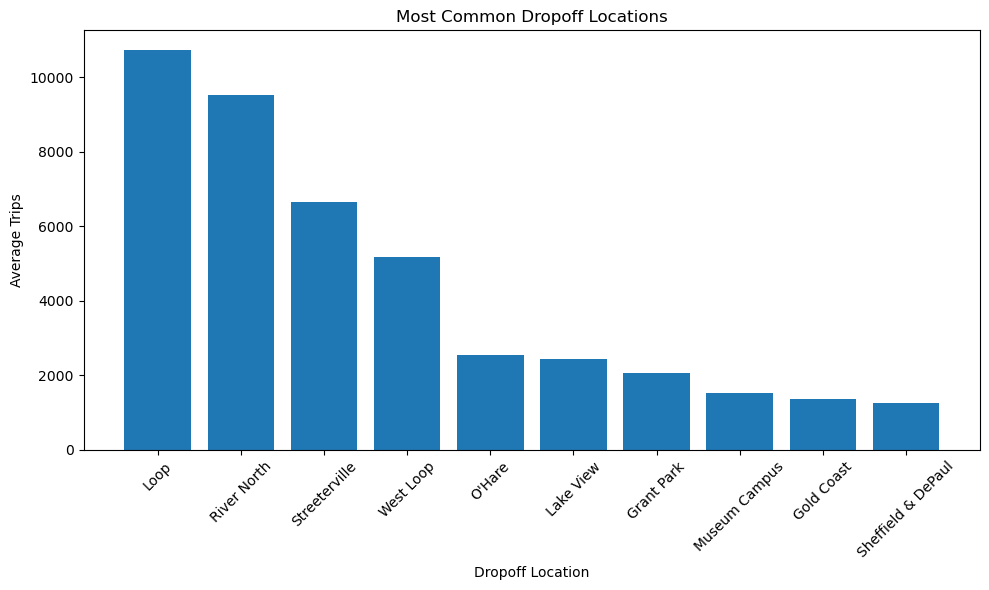

In [25]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed

# Data
drops = top_ten_sorted_df['dropoff_location_name']
counts = top_ten_sorted_df['average_trips']

# Plotting the bar chart
bars = ax.bar(drops, counts, label='Average Trips')

# Add axis labels
ax.set_xlabel('Dropoff Location')
ax.set_ylabel('Average Trips')

# Rotate x-axis labels to prevent overlapping
ax.tick_params(axis='x', rotation=45)  # Adjust rotation angle as needed

ax.set_title('Most Common Dropoff Locations')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


From the above graph, it can be concluded that the overall most popular drop off locations are the loop, River North, Streeterville, and West Loop in that order. They are followed by O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffield & Depaul. Though these are the ten most popular drop off locations, huge variation exists within this group. The number one listed neighborhood, Loop, has nearly 9 times as many drop offs as the tenth listed, Sheffield & Depaul. The forth listed West loop has about double as many drop offs as the fifth listed O'Hare. 

### 3. Identify the top 10 cab companies in terms of rides

In [26]:
top_companies= df_trips.sort_values(by='trips_amount', ascending=False).head(10)
top_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


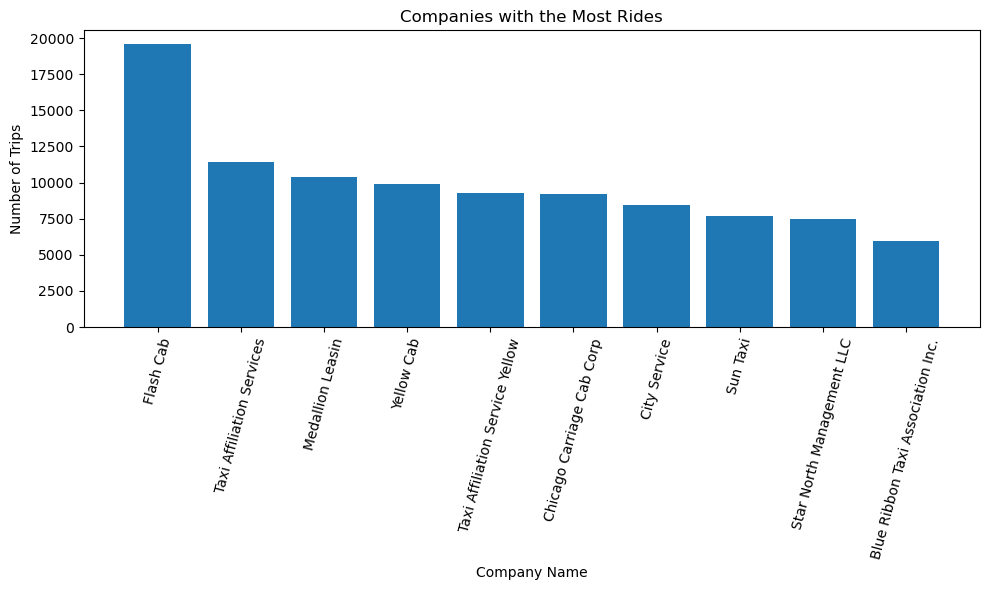

In [32]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed

# Data
drops = top_companies['company_name']
counts = top_companies['trips_amount']

# Plotting the bar chart
bars = ax.bar(drops, counts, label='Number of Trips')

# Add axis labels
ax.set_xlabel('Company Name')
ax.set_ylabel('Number of Trips')

# Rotate x-axis labels to prevent overlapping
ax.tick_params(axis='x', rotation=75)  # Adjust rotation angle as needed

ax.set_title('Companies with the Most Rides')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

From the above graph, it can be concluded that Flash cab is the most used company by a significant margin. It has 8,136 listed in the time period than it's closest competition, Taxi Affiliation Services. Meanwhile, Taxi Affiliation Services is followed closely by the rest of the top companies. 

### 3. Testing hypotheses: Rain and Ride Times 

This section will utilize hypothesis testing to see if the following hypothesis is supported through statistical analysis:
**The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.**

To do this an independent samples t-test will be carried out for the hypothesis. A t-test is a statistical method used to determine if there is a significant difference between the means of two groups. This test will look at both the mean and variability of each data set to determine the t-value, which is the difference between the means of two groups relative to the variation within the groups. The t-value is then used to determine the p-value. The p-value represents the probability of observing the data (or more extreme results) if the null hypothesis were true. This p-value will then be compared to the alpha value, a decimal number that represents the probability of incorrectly rejecting the null hypothesis when it is actually true. In the following testing, an alpha value of 0.05 will be used. If the p-value is less than the alpha, the null hypothesis is rejected. If the p-value is greater than alpha, the null hypothesis can not be rejected.

The dataframe that will be used is already filtered to only include Saturday rides. For each entry, the weather conditions are marked as good or bad. 

- **Null Hypothesis:** The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays.
- **Alternative Hypothesis:** The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [37]:
# Isolate Durations for good and bad weather
trips_bad = df_ch.query("weather_conditions =='Bad'")['duration_seconds'].dropna().reset_index(drop=True)
trips_good = df_ch.query("weather_conditions =='Good'")['duration_seconds'].dropna().reset_index(drop=True)

alpha = 0.05 # Critical Statistical Significance level

# Perform t-test
results = st.ttest_ind(trips_bad, trips_good)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  6.517970327099473e-12
We reject the null hypothesis


Based on the p-value of approximately 6.5179e-12, we reject the null hypothesis. The p-value is significantly smaller than the alpha value, showing that hypothesis testing does not support that the average ride times are the same in both good and bad weather. 